## LINEAR REGRESSION

In [1]:
df=read.csv('C:\\Users\\abine\\OneDrive\\Documents\\Datasets\\advertising\\advertising.csv',sep=',')
head(df)
summary(df)

TV,Radio,Newspaper,Sales
230.1,37.8,69.2,22.1
44.5,39.3,45.1,10.4
17.2,45.9,69.3,12.0
151.5,41.3,58.5,16.5
180.8,10.8,58.4,17.9
8.7,48.9,75.0,7.2


       TV             Radio          Newspaper          Sales      
 Min.   :  0.70   Min.   : 0.000   Min.   :  0.30   Min.   : 1.60  
 1st Qu.: 74.38   1st Qu.: 9.975   1st Qu.: 12.75   1st Qu.:11.00  
 Median :149.75   Median :22.900   Median : 25.75   Median :16.00  
 Mean   :147.04   Mean   :23.264   Mean   : 30.55   Mean   :15.13  
 3rd Qu.:218.82   3rd Qu.:36.525   3rd Qu.: 45.10   3rd Qu.:19.05  
 Max.   :296.40   Max.   :49.600   Max.   :114.00   Max.   :27.00  

In [2]:
str(df)

'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ Radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ Newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ Sales    : num  22.1 10.4 12 16.5 17.9 7.2 11.8 13.2 4.8 15.6 ...


In [3]:
any(is.na(df))

[1] FALSE

In [4]:
library(ggplot2)
library(ggthemes)
library(dplyr)

Warning message:
"package 'ggplot2' was built under R version 3.6.2"Warning message:
"package 'ggthemes' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
num.cols=sapply(df,is.numeric)
cor.data=cor(df[,num.cols])
cor.data

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.9012079
Radio,0.05480866,1.00000000,0.35410375,0.3496311
Newspaper,0.05664787,0.35410375,1.00000000,0.1579600
Sales,0.90120791,0.34963110,0.15796003,1.0000000


In [8]:
install.packages('corrgram')
install.packages('corrplot')

Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'corrgram' is in use and will not be installed"Installing package into 'C:/Users/abine/OneDrive/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'corrplot' is in use and will not be installed"

In [9]:
library('corrgram')
library('corrplot')

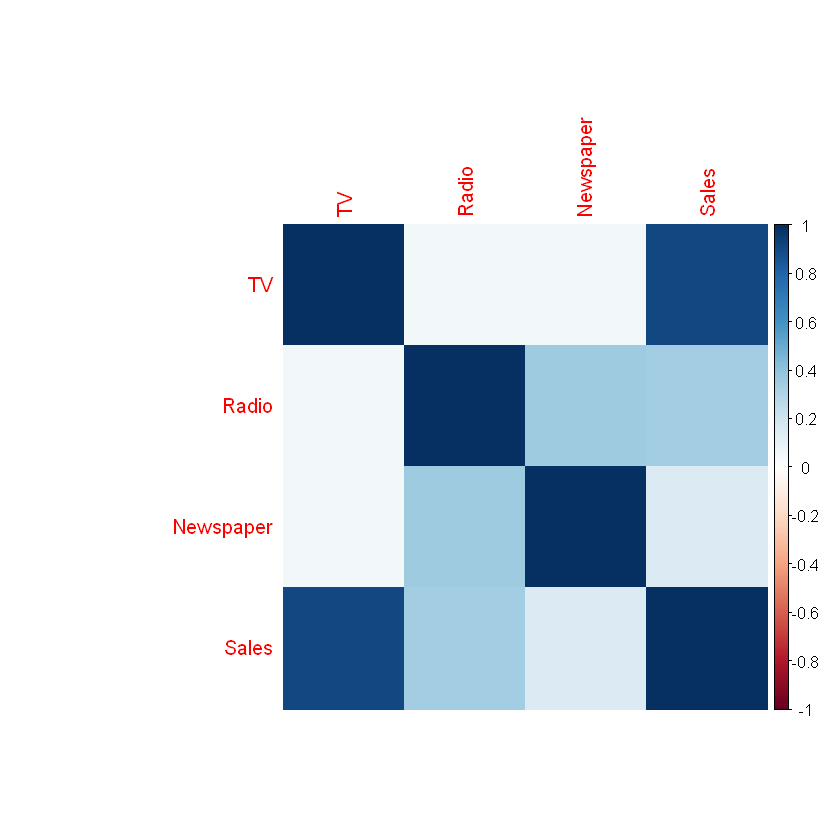

In [10]:
corrplot(cor.data,method='color')

*INTERPRETATION*
There is positive correlation between Sales and (TV,Radio & Newspaper in order).
i.e as the no.of advertisement in these medias increases/decreases the sales also increases/decreases

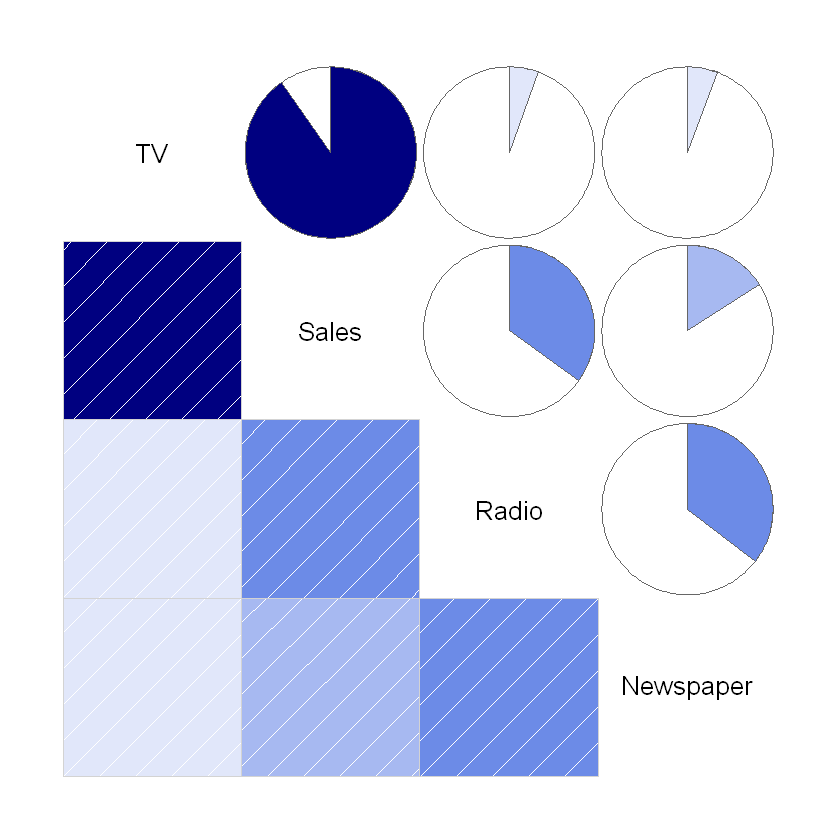

In [11]:
corrgram(df,order=TRUE, lower.panel=panel.shade,
         upper.panel=panel.pie, text.panel=panel.txt)

In [ ]:
INTERPRETATION
Different Visual Representation of the above graph

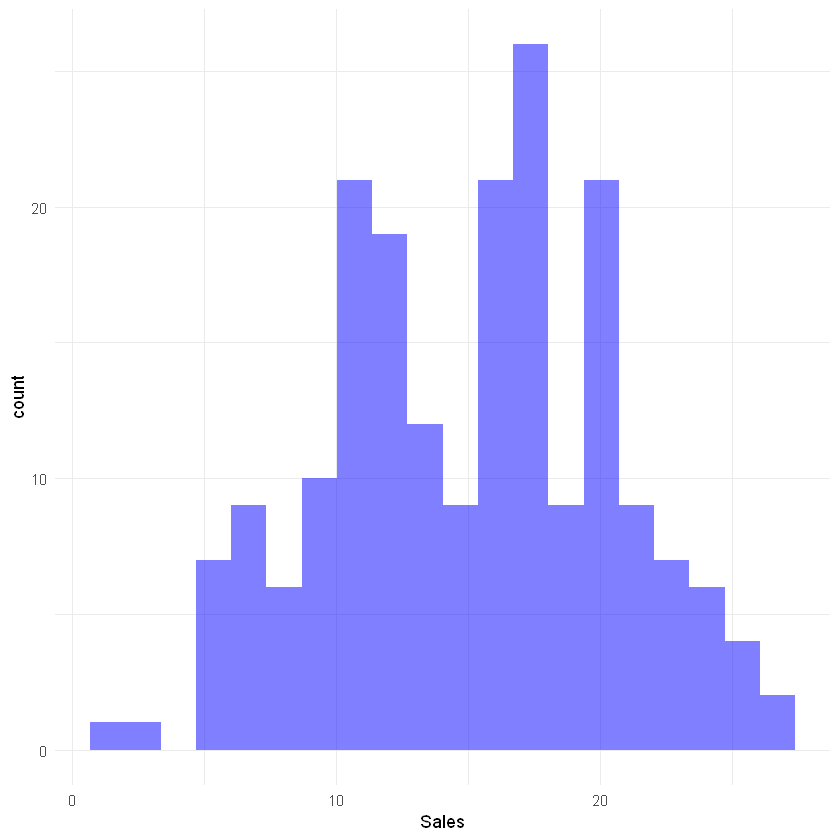

In [12]:
ggplot(df,aes(x=Sales))+geom_histogram(bins=20,alpha=0.5,fill='blue')+theme_minimal()

INTERPRETATION
The average sales is around 15 units

In [13]:
library(caTools)

sample=sample.split(df$Sales,SplitRatio = 0.70)

train=subset(df,sample==TRUE)
test=subset(df,sample==FALSE)

Warning message:
"package 'caTools' was built under R version 3.6.2"

In [14]:
model=lm(Sales~.,train)

summary(model)


Call:
lm(formula = Sales ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0770 -0.7685  0.0926  0.8378  3.5774 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.242053   0.375736  11.290   <2e-16 ***
TV          0.055545   0.001644  33.792   <2e-16 ***
Radio       0.110703   0.010209  10.843   <2e-16 ***
Newspaper   0.001400   0.007265   0.193    0.847    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.655 on 136 degrees of freedom
Multiple R-squared:  0.9022,	Adjusted R-squared:    0.9 
F-statistic: 418.1 on 3 and 136 DF,  p-value: < 2.2e-16


INTERPRETATION
• Here Sales is the dependent variable we want to predict 
• Here, we have the intercept and coefficients for value (Estimate)
• Residuals is difference between observed and predicted value of dependent variable 
• Higher the number of *’s indicates higher the significance level(It’s based on p-value. Lesser the p-value, more the stars)
• Here TV,radio has high significance level
• p-value is the probability of a variable being not relevant
• t value shows how many S.D’s the  Coefficient is away from Zero 

In [15]:
res=residuals(model)

res=as.data.frame(res)
head(res)

res
0.7955185
-0.7276107
1.6242423
-0.8111121
2.3380109
-3.0437159


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


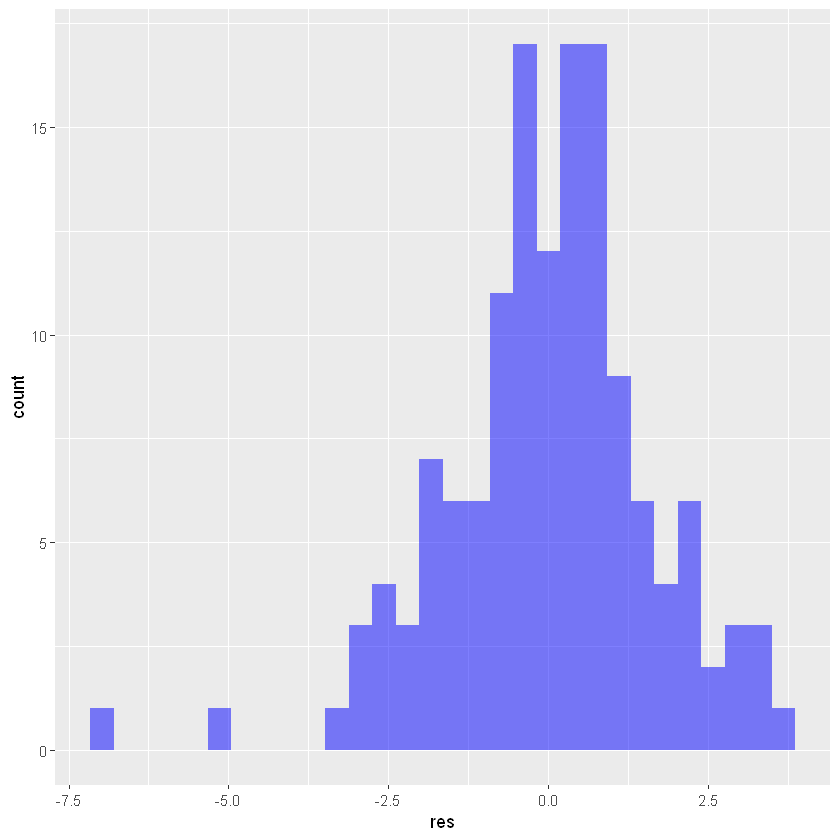

In [16]:
ggplot(res,aes(res))+geom_histogram(fill='blue',alpha=0.5)

Plotting Residuals to check whether its Normal Distribution

In [17]:
Sales.predictions=predict(model,test)
head(Sales.predictions)

11        16        18        19        22        26 
 8.589554 20.450205 24.334450 10.380823 18.025965 19.259640

In [18]:
results=cbind(Sales.predictions,test$Sales)
colnames(results)=c('pred','real')
results=as.data.frame(results)
head(results)

,pred,real
11,8.589554,12.6
16,20.450205,22.4
18,24.334450,24.4
19,10.380823,11.3
22,18.025965,17.5
26,19.259640,17.0


In [19]:
to_zero=function(x){
  if (x<0){
    return(0)
  }else{
    return(x)
  }
}

In [20]:
results$pred=sapply(results$pred,to_zero)
head(results)

,pred,real
11,8.589554,12.6
16,20.450205,22.4
18,24.334450,24.4
19,10.380823,11.3
22,18.025965,17.5
26,19.259640,17.0


In [21]:
mse=mean((results$real-results$pred)^2)
print(mse)

mse^0.5

[1] 2.89007


[1] 1.700021

• This is a RMSE value.RMSE is a measure of how spread out these residuals are. In other words, it tells you how con centrated the data is around the line of best fit

In [22]:
SSE=sum((results$pred-results$real)^2)
SST=sum((mean(df$Sales)-results$real)^2)
R2=1-SSE/SST
R2

[1] 0.897095

• R-squared is a goodness-of-fit measure for linear regression models.
• R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. 
• this model can explain more 89% of the variation.

## SIMPLE LINEAR REGRESSION

In [23]:
model=lm(Sales~TV,train)

summary(model)


Call:
lm(formula = Sales ~ TV, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1635 -1.4829 -0.1515  1.5254  5.7551 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.841055   0.374676   18.26   <2e-16 ***
TV          0.054943   0.002299   23.90   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.318 on 138 degrees of freedom
Multiple R-squared:  0.8054,	Adjusted R-squared:  0.804 
F-statistic: 571.2 on 1 and 138 DF,  p-value: < 2.2e-16


INTERPRETATION
• Here Sales is the dependent variable we want to predict 
• Here, we have the intercept and coefficients for value (Estimate)
• Residuals is difference between observed and predicted value of dependent variable 
• Higher the number of *’s indicates higher the significance level(It’s based on p-value. Lesser the p-value, more the stars)
• Here TV  has high significance level
• p-value is the probability of a variable being not relevant
• t value shows how many S.D’s the  Coefficient is away from Zero 

In [24]:
res=residuals(model)

res=as.data.frame(res)
head(res)

res
2.6166261
1.1139942
4.2139304
1.3351236
1.1253020
-0.1190566


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


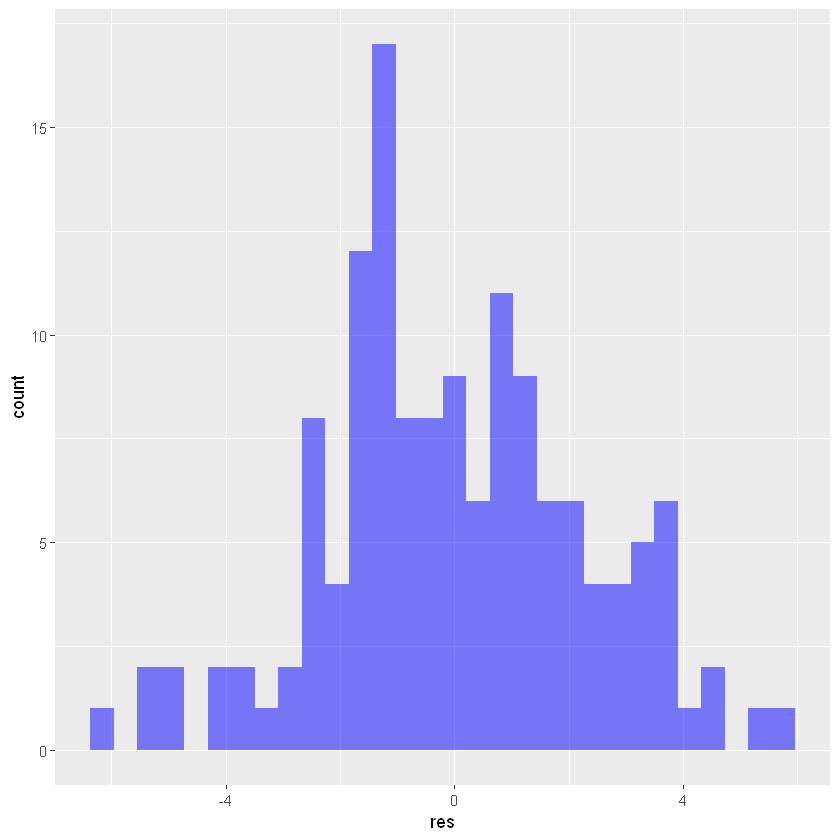

In [25]:
ggplot(res,aes(res))+geom_histogram(fill='blue',alpha=0.5)

Plotting Residuals to check whether its Normal Distribution

In [26]:
Sales.predictions=predict(model,test)
head(Sales.predictions)

11       16       18       19       22       26 
10.47277 17.57686 22.30194 10.64309 19.88446 21.28549

In [27]:
results=cbind(Sales.predictions,test$Sales)
colnames(results)=c('pred','real')
results=as.data.frame(results)
head(results)

,pred,real
11,10.47277,12.6
16,17.57686,22.4
18,22.30194,24.4
19,10.64309,11.3
22,19.88446,17.5
26,21.28549,17.0


In [28]:
to_zero=function(x){
  if (x<0){
    return(0)
  }else{
    return(x)
  }
}

In [29]:
results$pred=sapply(results$pred,to_zero)
head(results)

,pred,real
11,10.47277,12.6
16,17.57686,22.4
18,22.30194,24.4
19,10.64309,11.3
22,19.88446,17.5
26,21.28549,17.0


In [30]:
mse=mean((results$real-results$pred)^2)
print(mse)

mse^0.5

[1] 5.189018


[1] 2.277942

• This is a RMSE value.RMSE is a measure of how spread out these residuals are. In other words, it tells you how con centrated the data is around the line of best fit

In [31]:
SSE=sum((results$pred-results$real)^2)
SST=sum((mean(df$Sales)-results$real)^2)
R2=1-SSE/SST
R2

[1] 0.8152377

• R-squared is a goodness-of-fit measure for linear regression models. 
• R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale. 
• this model can explain more 81% of the variation.